## read data

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics


In [2]:
def transform_categorical(df, caterogical_columns):
    transformer = make_column_transformer(
    (OneHotEncoder(), caterogical_columns),
    remainder='passthrough')
    transformed = transformer.fit_transform(df)
    transformed_df = pd.DataFrame(transformed)
    return transformed_df

In [3]:
airline_passenger_satisfaction = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
DrugsABCXY = ['Sex', 'BP', 'Cholesterol']
stroke_prediction_dataset = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

## airline-passenger-satisfaction

In [4]:
train_df = pd.read_csv("data/airline-passenger-satisfaction/train.csv")
test_df = pd.read_csv("data/airline-passenger-satisfaction/test.csv")

train_df.pop("Unnamed: 0")
train_df.pop("id")
train_df = train_df.dropna()

test_df.pop("Unnamed: 0")
test_df.pop("id")
test_df = test_df.dropna()

y_train = train_df.pop('satisfaction')
y_test = test_df.pop('satisfaction')

train_df = transform_categorical(train_df, airline_passenger_satisfaction)
test_df = transform_categorical(test_df, airline_passenger_satisfaction)




[[13940   588]
 [ 2309  9056]]


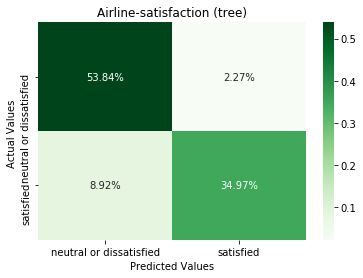

In [5]:
tree_airline_passenger_satisfaction = tree.DecisionTreeClassifier(max_depth = 4)
tree_airline_passenger_satisfaction.fit(train_df, y_train)

# metrics.plot_roc_curve(tree_airline_passenger_satisfaction, test_df, y_test)
predicted = tree_airline_passenger_satisfaction.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Airline-satisfaction (tree)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['neutral or dissatisfied', 'satisfied']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()


[[13484  1044]
 [ 1532  9833]]


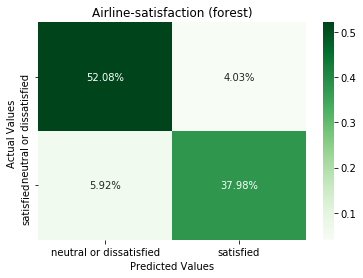

In [6]:

forest_airline_passenger_satisfaction = RandomForestClassifier(max_depth=4)
forest_airline_passenger_satisfaction.fit(train_df, y_train)

# metrics.plot_roc_curve(forest_airline_passenger_satisfaction, test_df, y_test)
predicted = forest_airline_passenger_satisfaction.predict(test_df)

proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Airline-satisfaction (forest)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['neutral or dissatisfied', 'satisfied']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

## stroke-prediction-dataset

In [7]:
train_df = pd.read_csv("data/stroke-prediction-dataset/train.csv")
test_df = pd.read_csv("data/stroke-prediction-dataset/test.csv")


train_df = train_df.dropna()
test_df = test_df.dropna()
train_number_rows = train_df.shape[0]

y_train = train_df.pop('stroke')
y_test = test_df.pop('stroke')

df = pd.concat([train_df, test_df])
df = transform_categorical(df, stroke_prediction_dataset)

train_df = df.iloc[:train_number_rows, :]
test_df = df.iloc[train_number_rows:, :]



[[940   5]
 [ 41   2]]


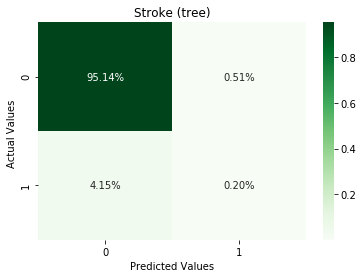

In [8]:
tree_stroke_prediction_dataset = tree.DecisionTreeClassifier(max_depth = 4)
tree_stroke_prediction_dataset.fit(train_df, y_train)

# metrics.plot_roc_curve(tree_stroke_prediction_dataset, test_df, y_test)
predicted = tree_stroke_prediction_dataset.predict(test_df)

proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Stroke (tree)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['0', '1']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

[[945   0]
 [ 43   0]]


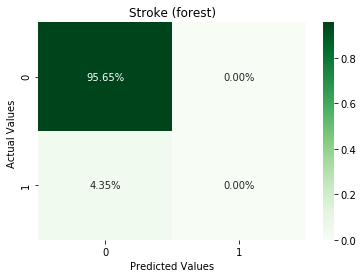

In [9]:
forest_stroke_prediction_dataset = RandomForestClassifier(max_depth=4)
forest_stroke_prediction_dataset.fit(train_df, y_train)

# metrics.plot_roc_curve(forest_stroke_prediction_dataset, test_df, y_test)
predicted = forest_stroke_prediction_dataset.predict(test_df)

proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Stroke (forest)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['0', '1']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

## DrugsABCXY

In [10]:
train_df = pd.read_csv("data/DrugsABCXY/train.csv")
test_df = pd.read_csv("data/DrugsABCXY/test.csv")

y_train = train_df.pop('Drug')
y_test = test_df.pop('Drug')

train_df = transform_categorical(train_df, DrugsABCXY)
test_df = transform_categorical(test_df, DrugsABCXY)



[[ 6  0  0  0]
 [ 0  7  0  0]
 [ 0  0  9  0]
 [ 0  0  0 18]]


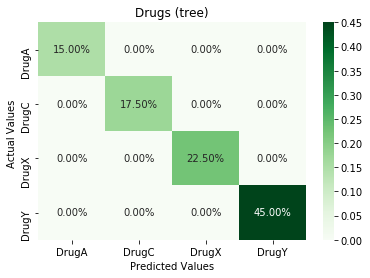

In [11]:
tree_drugsabcxy = tree.DecisionTreeClassifier(max_depth = 4)
tree_drugsabcxy.fit(train_df, y_train)

predicted = tree_drugsabcxy.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Drugs (tree)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['DrugA', 'DrugC', 'DrugX', 'DrugY']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()


[[ 6  0  0  0]
 [ 0  7  0  0]
 [ 0  0  9  0]
 [ 0  0  0 18]]


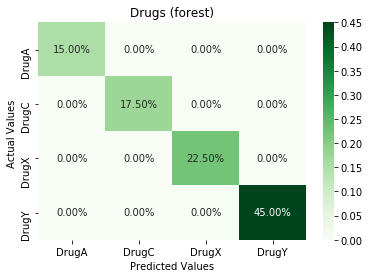

In [12]:
forest_drugsabcxy = RandomForestClassifier(max_depth=4)
forest_drugsabcxy.fit(train_df, y_train)

predicted = forest_drugsabcxy.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Drugs (forest)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['DrugA', 'DrugC', 'DrugX', 'DrugY']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()



## mobile-price-classification

In [13]:
train_df = pd.read_csv("data/mobile-price-classification/train.csv")
test_df = pd.read_csv("data/mobile-price-classification/test.csv")

y_train = train_df.pop('price_range')
y_test = test_df.pop('price_range')

[[82 10  0  0]
 [10 69 17  0]
 [ 0  8 75 16]
 [ 0  0 14 99]]


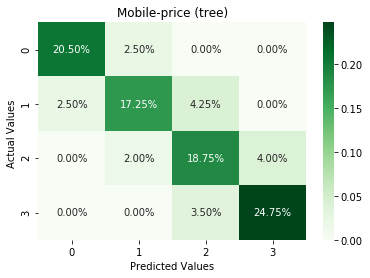

In [14]:
tree_mobile_price_classification = tree.DecisionTreeClassifier(max_depth = 4)
tree_mobile_price_classification.fit(train_df, y_train)

predicted = tree_mobile_price_classification.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Mobile-price (tree)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['0', '1', '2', '3']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

[[ 90   2   0   0]
 [ 10  78   8   0]
 [  0  22  68   9]
 [  0   0   7 106]]


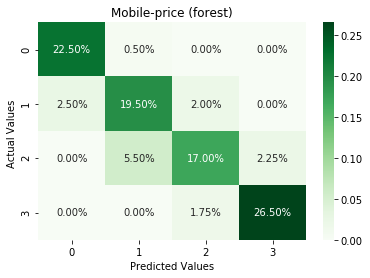

In [15]:
forest_mobile_price_classification = RandomForestClassifier(max_depth=4)
forest_mobile_price_classification.fit(train_df, y_train)

predicted = forest_mobile_price_classification.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Mobile-price (forest)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['0', '1', '2', '3']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

## wheat-seeds

In [16]:
train_df = pd.read_csv("data/wheat-seeds/train.csv")
test_df = pd.read_csv("data/wheat-seeds/test.csv")

y_train = train_df.pop('Type')
y_test = test_df.pop('Type')


[[14  0  3]
 [ 0 14  0]
 [ 2  0  7]]


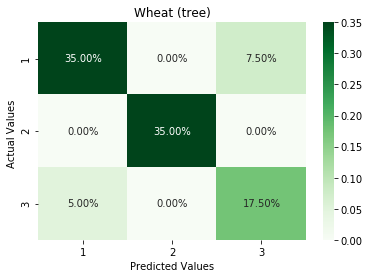

In [17]:
tree_wheat_seeds = tree.DecisionTreeClassifier(max_depth = 4)
tree_wheat_seeds.fit(train_df, y_train)

predicted = tree_wheat_seeds.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Wheat (tree)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['1', '2', '3']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

[[15  0  2]
 [ 0 14  0]
 [ 2  0  7]]


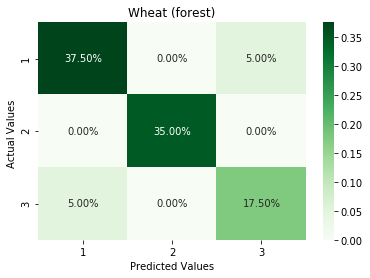

In [18]:
forest_wheat_seeds = RandomForestClassifier(max_depth=4)
forest_wheat_seeds.fit(train_df, y_train)

predicted = forest_wheat_seeds.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Wheat (forest)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['1', '2', '3']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

## winequality-red

In [19]:
train_df = pd.read_csv("data/winequality-red/train.csv")
test_df = pd.read_csv("data/winequality-red/test.csv")

y_train = train_df.pop('quality')
y_test = test_df.pop('quality')

[[ 0  0  2  1  0  0]
 [ 0  0  7  4  0  0]
 [ 0  0 95 37  0  0]
 [ 0  0 43 77  3  0]
 [ 0  0  8 34  8  0]
 [ 0  0  0  1  0  0]]


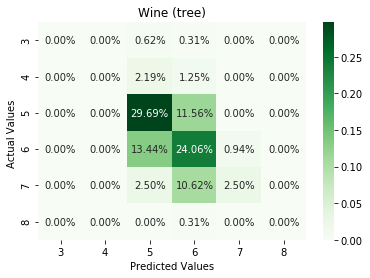

In [20]:
tree_winequality_red = tree.DecisionTreeClassifier(max_depth = 4)
tree_winequality_red.fit(train_df, y_train)

predicted = tree_winequality_red.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Wine (tree)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['3', '4', '5', '6', '7', '8']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

[[  0   0   3   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 100  32   0   0]
 [  0   0  39  84   0   0]
 [  0   0   3  41   6   0]
 [  0   0   0   1   0   0]]


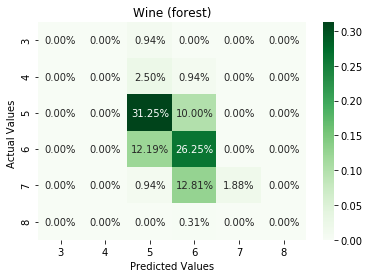

In [21]:
forest_winequality_red = RandomForestClassifier(max_depth=4)
forest_winequality_red.fit(train_df, y_train)

predicted = forest_winequality_red.predict(test_df)


proper = y_test
conf_matrix = metrics.confusion_matrix(proper, predicted)

print(conf_matrix)



ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Greens')

ax.set_title('Wine (forest)')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
labels = ['3', '4', '5', '6', '7', '8']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()